In [1]:
%matplotlib inline

# Nonlinear Regression

In real world, we usually did not encounter a phenomena that follows a straight line equation. Rather, cyclical or nonlinear equations will take place. 

I could not find a lot of tutorial while browsing the nonlinear regression on the internet because of it's complexity in computation. Most of the reference is either heavy on the theory part or just showing how to use the tools created by other people. 

So for this note/simulation, I will try to combine both aspects so that we could at least understand why and how we should do nonlinear regression for analysis. 

Reference:
* https://online.stat.psu.edu/stat462/node/204/
* https://www.geeksforgeeks.org/non-linear-regression-examples-ml/
* https://www.wallstreetmojo.com/nonlinear-regression/#:~:text=How%20do%20you%20calculate%20nonlinear,X%20β%20are%20vector%20parameters.
* https://kops.uni-konstanz.de/bitstream/handle/123456789/59650/Kaltenbach_2-1ofyba49ud2jr5.pdf?sequ

Let say that we observed 100 data points that follows a nonlinear graph. 

In [2]:
import numpy as np

y = lambda x: 2.5*(x**3) - 2/x

X = np.linspace(0.05, 3, 100) # generate 100 x's
Y = y(X) # generate 100 y's
Y_noise = np.random.normal(size=100, scale = 3)
Y = Y + Y_noise

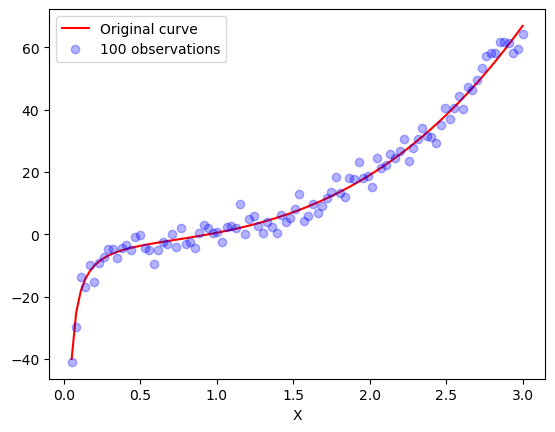

In [3]:
import matplotlib.pyplot as plt

plt.plot(X,y(X), color='red', label = "Original curve")
plt.plot(X,Y, 'bo', label = "100 observations", alpha = 0.3)
plt.xlabel("X")
plt.legend()

Now let's pretend that we do not know the actual function for our data. For this case, we'll be left with only the 100 observations.

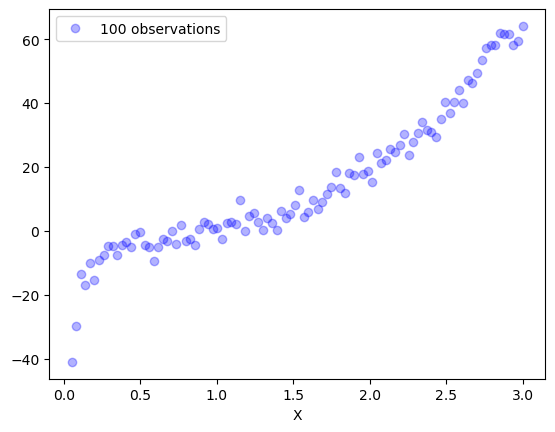

In [4]:
plt.plot(X,Y, 'bo', label = "100 observations", alpha = 0.3)
plt.xlabel("X")
plt.legend()

The first step that researchers usually do is to fit in the observations with any model that feels right. For instance, looking at the above graph, I might guess that the data follow a polynomial function with degree 2. Which means that 

$$ Y = b_{0} + b_{1}X + b_{2}X^{2} $$

Now, I will choose to plot the graph for my polynomial function of degree 2 by taking $b_{0}=0, b_{1}=0, b_{2}=1$. I.e, I will plot just 

$$ Y = X^{2} $$

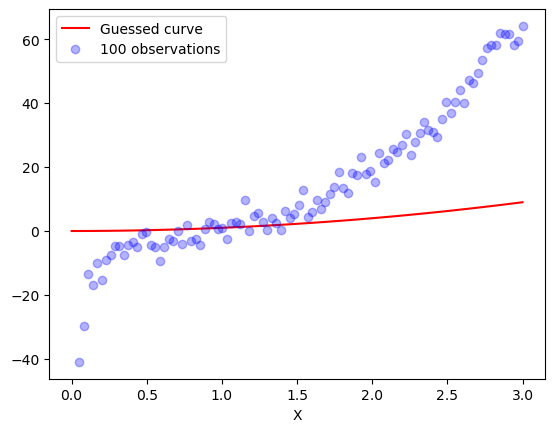

In [5]:
y_guess = lambda x: x**2 # my guessed function

X_guess = np.linspace(0,3) 
Y_guess = y_guess(X)

plt.plot(X_guess,y_guess(X_guess), color='red', label = "Guessed curve")
plt.plot(X,Y, 'bo', label = "100 observations", alpha = 0.3)
plt.xlabel("X")
plt.legend()

My guessed is totally off by way too much. I can calculate my error using the MSE

$$ MSE = \sum_{i=1}^{m} \left(\frac{Y_{i} - \hat{Y_{i}}}{\sigma_{Yi}}\right)^{2} $$

and we'll need to minimize this MSE so that we could get the best value for $ b_{0}, b_{1}, b_{2}$.

This optimization problem can be solved by using various numerical technique such as the Newton-Raphson & Levenberg Marquardt method. However, coding these techniques requires a thorough understanding on the mathematical concept of calculus. Other techniques to solve the optimization problem such as by using machine learning.

For the following simulation, I'll use the Levenberg Marquardt algorithm to solve the optimum MSE for the nonlinear curve above. This algorithm can be found through the scipy package.

In [6]:
from scipy.optimize import curve_fit

def funy(x, a, b, c):
    return a + b*x + c*(x**2)

# the curve fit function accept curve_fit( f(), X data, Y data). The method 'lm' stands for levenberg-marquardt
opt_point, point_cov = curve_fit(funy, X, Y, method='lm')

# showing the optimum parameters that has minimum MSE
opt_point

array([-10.92564436,   1.42573233,   7.54158546])

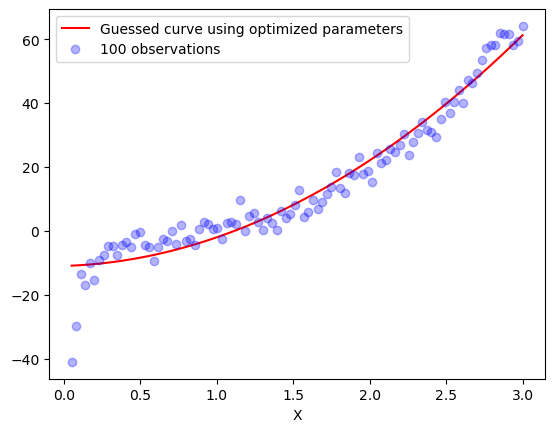

In [7]:
y_opt = lambda x: opt_point[0] + opt_point[1]*x + opt_point[2]*(x**2)

plt.plot(X,y_opt(X), color='red', label = "Guessed curve using optimized parameters")
plt.plot(X,Y, 'bo', label = "100 observations", alpha = 0.3)
plt.xlabel("X")
plt.legend()

And there you go, you have finish the step for doing nonlinear regression.

Usually researcher will thoroughly check their model above by using the model to predict a test set of data. Precaution step prior to selecting appropriate model also need to be conducted such as by doing research from other experiments/discussion by fellow scientists.

To summarize, conducting nonlinear regression will need to have:
1. Doing thorough research to understand the nature of our data.
2. Select some appropriate models to be tested.
3. Use algorithm that can find the best paramater to minimize our MSE.
4. Do comparison on the pros and cons of each model that we have tested.
5. Use a test data to check the accuracy of our selected nonlinear equation to model our problem. 